In [13]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table
from scipy.stats import gaussian_kde

plt.rcParams['figure.figsize'] = (15, 8)

In [2]:
dev = Table.read('/home/aalvarez/Phosphoros/Results/Quickstart/catalog/phz_cat.fits')
dev_post = Table.read('/home/aalvarez/Phosphoros/Results/Quickstart/catalog_dev/posteriors/Sample_File_posterior_1.fits')

In [3]:
sam = Table.read('/home/aalvarez/Phosphoros/Results/Quickstart/catalog/phz_cat.fits')
sam_post = Table.read('/home/aalvarez/Phosphoros/Results/Quickstart/catalog/posteriors/Sample_File_posterior_1.fits')

In [4]:
nobjects = 20

In [5]:
assert (sam['ID'] == dev['ID']).all()

In [6]:
obj_idx = np.random.choice(len(sam), size=nobjects, replace=False)

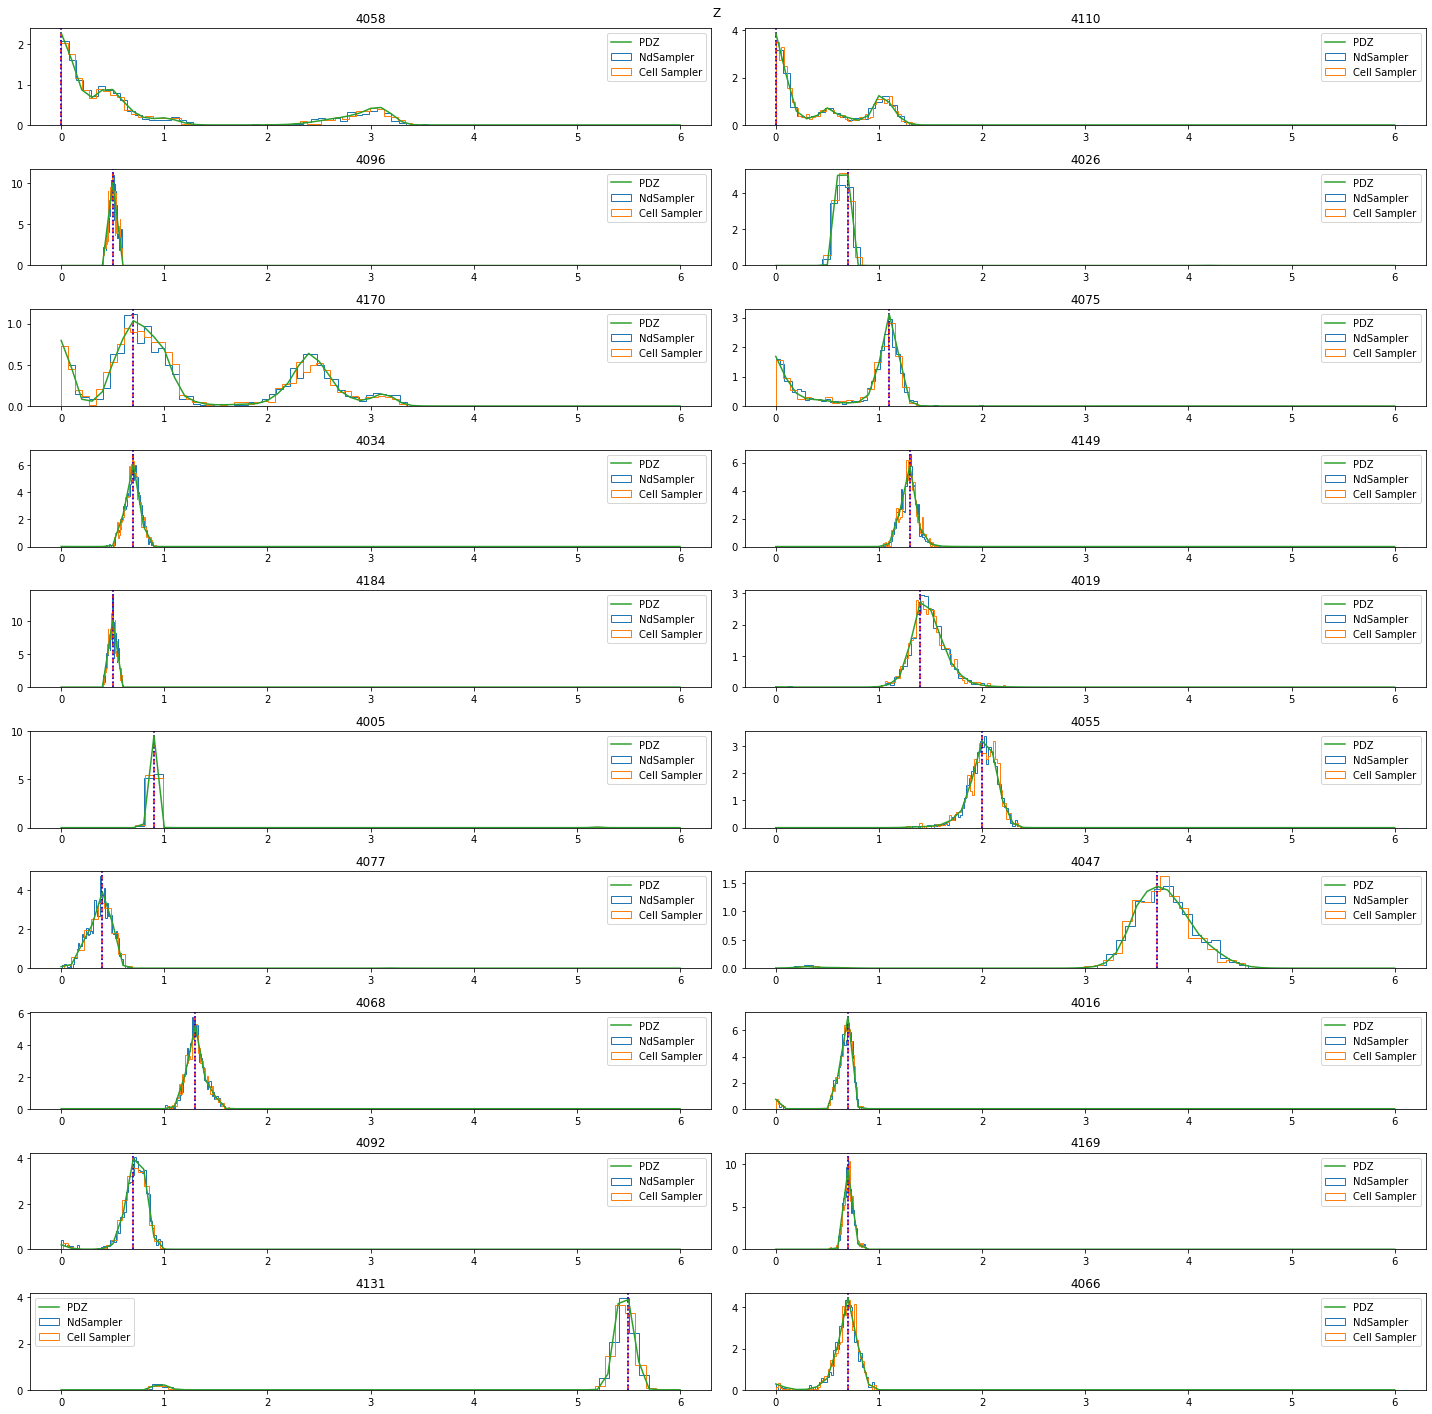

In [21]:
z_axis = np.linspace(0, 6, 61)
ncols = 2
nrows = nobjects // ncols

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 20))

plt.suptitle('Z')
for idx, ax in zip(obj_idx, axes.ravel()):
    obj_id = sam[idx]['ID']
    ax.set_title(obj_id)
    ax.axvline(sam[idx]['1DPDF-Peak-Z'], color='red', linestyle='--')
    ax.axvline(dev[idx]['1DPDF-Peak-Z'], color='blue', linestyle=':')
    sam_mask = sam_post['OBJECT_ID'] == obj_id
    sam_z = gaussian_kde(sam_post[sam_mask]['REDSHIFT'])
    ax.hist(sam_post[sam_mask]['REDSHIFT'], bins=50, histtype='step', label='NdSampler', density=True)
    dev_mask = dev_post['OBJECT_ID'] == obj_id
    ax.hist(dev_post[dev_mask]['REDSHIFT'], bins=50, histtype='step', label='Cell Sampler', density=True)
    ax.plot(z_axis, sam['Z-1D-PDF'][idx], label='PDZ')
    ax.legend()
plt.tight_layout()
plt.show()

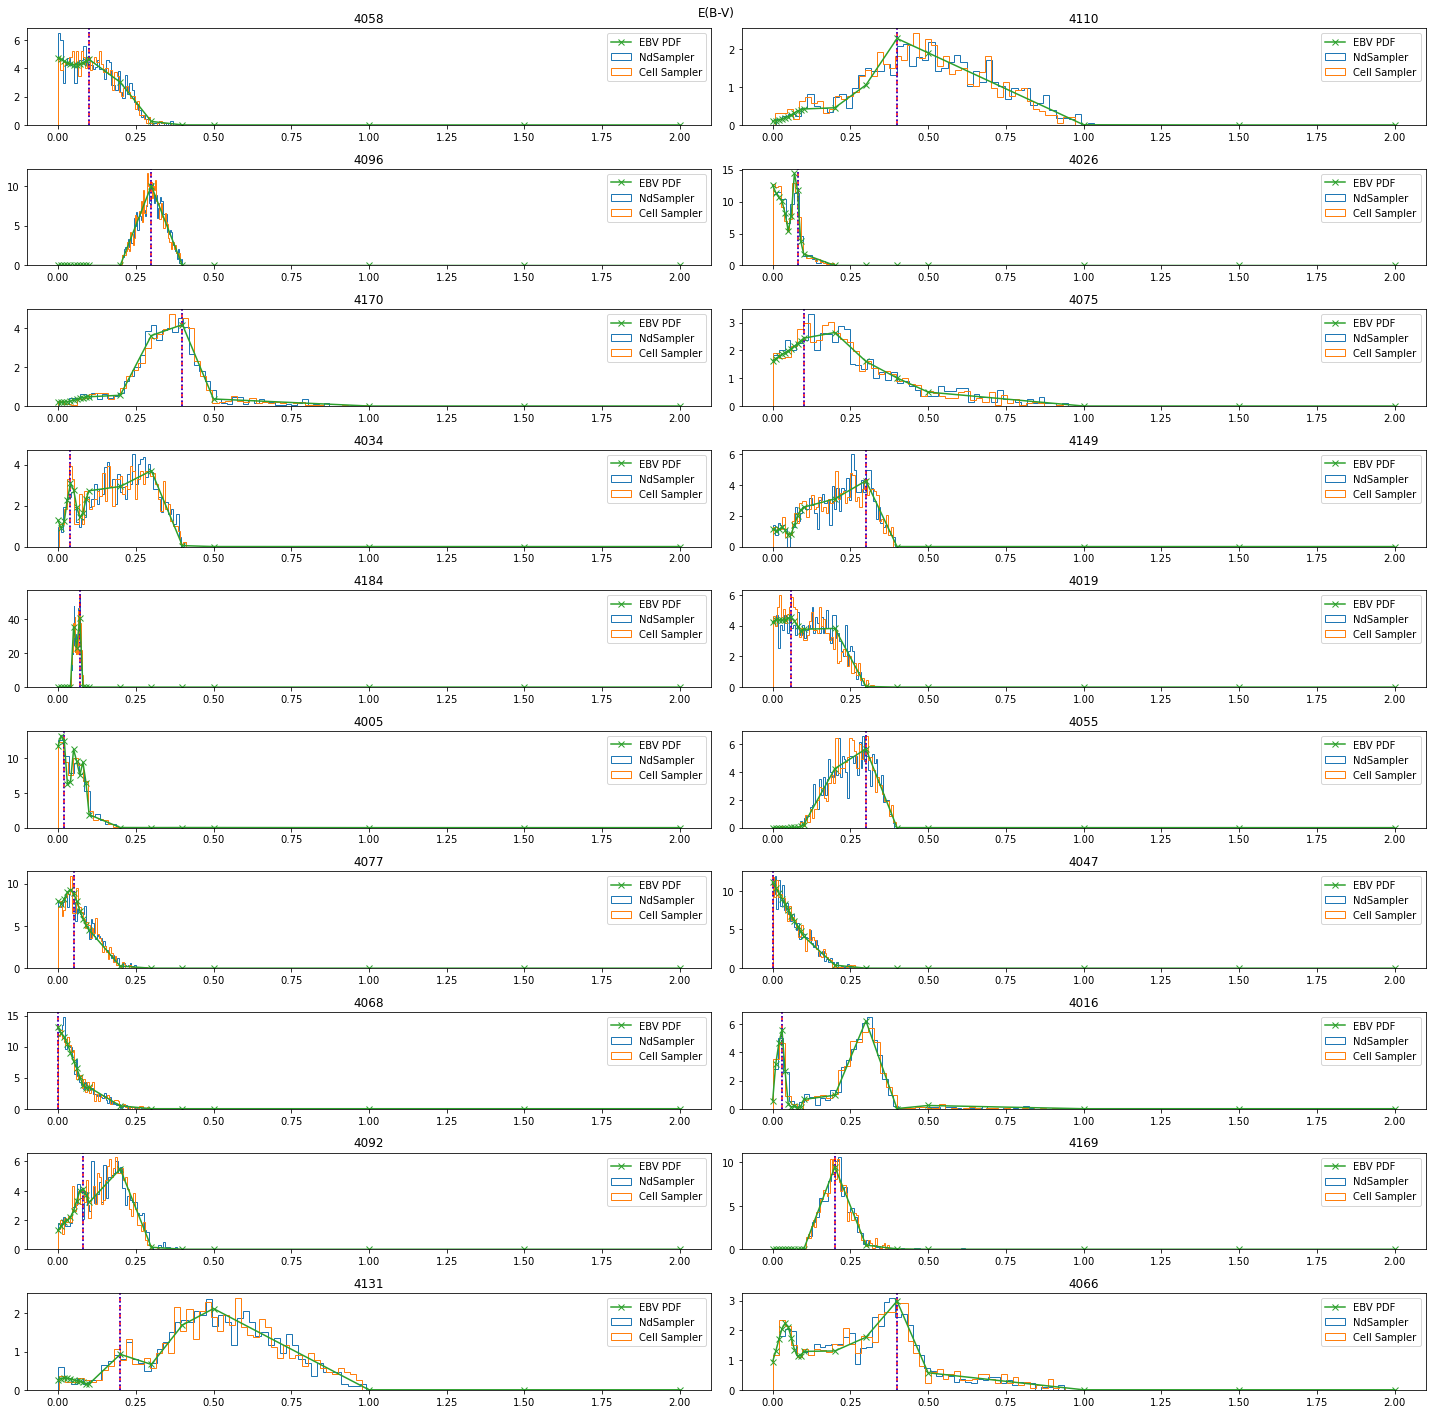

In [8]:
ebv_axes = np.array([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,
                     0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0])

ncols = 2
nrows = nobjects // ncols

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 20))

plt.suptitle('E(B-V)')
for idx, ax in zip(obj_idx, axes.ravel()):
    obj_id = sam[idx]['ID']
    ax.set_title(obj_id)
    ax.axvline(sam[idx]['E(B-V)'], color='red', linestyle='--')
    ax.axvline(dev[idx]['E(B-V)'], color='blue', linestyle=':')
    sam_mask = sam_post['OBJECT_ID'] == obj_id
    ax.hist(sam_post[sam_mask]['EB_V'], bins=50, histtype='step', label='NdSampler', density=True)
    dev_mask = dev_post['OBJECT_ID'] == obj_id
    ax.hist(dev_post[dev_mask]['EB_V'], bins=50, histtype='step', label='Cell Sampler', density=True)
    ax.plot(ebv_axes, sam['EBV-1D-PDF'][idx], label='EBV PDF', marker='x')
    ax.legend()
plt.tight_layout()
plt.show()

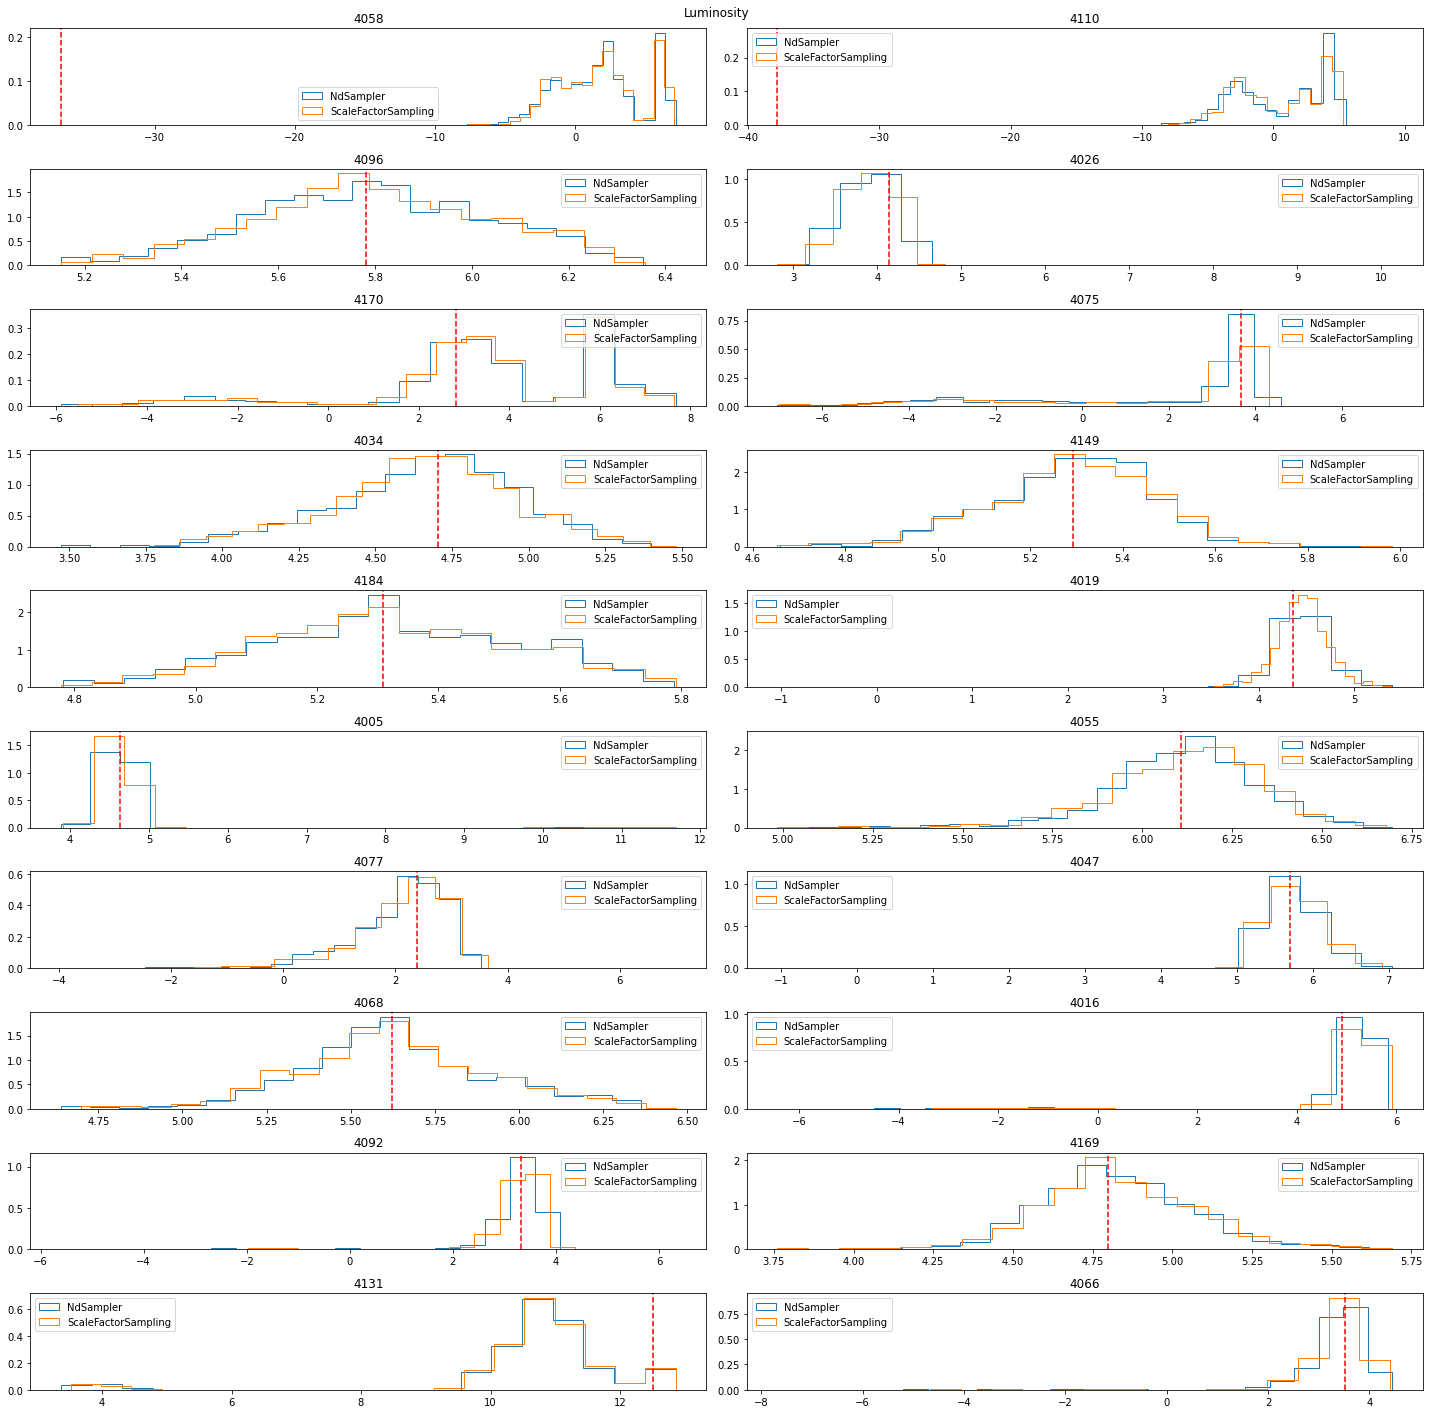

In [27]:
ncols = 2
nrows = nobjects // ncols

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 20))

plt.suptitle('Luminosity')
for idx, ax in zip(obj_idx, axes.ravel()):
    obj_id = sam[idx]['ID']
    ax.set_title(obj_id)
    ax.axvline(np.log(sam['Scale'][idx]), color='red', linestyle='--')
    sam_mask = sam_post['OBJECT_ID'] == obj_id
    ax.hist(np.log(sam_post['LUMINOSITY'][sam_mask]), bins=20, histtype='step', label='NdSampler', density=True)
    dev_mask = dev_post['OBJECT_ID'] == obj_id
    ax.hist(np.log(dev_post['LUMINOSITY'][dev_mask]), bins=20, histtype='step', label='ScaleFactorSampling', density=True)
    ax.legend()
plt.tight_layout()
plt.savefig('/home/aalvarez/Downloads/Lumi.png')
plt.show()

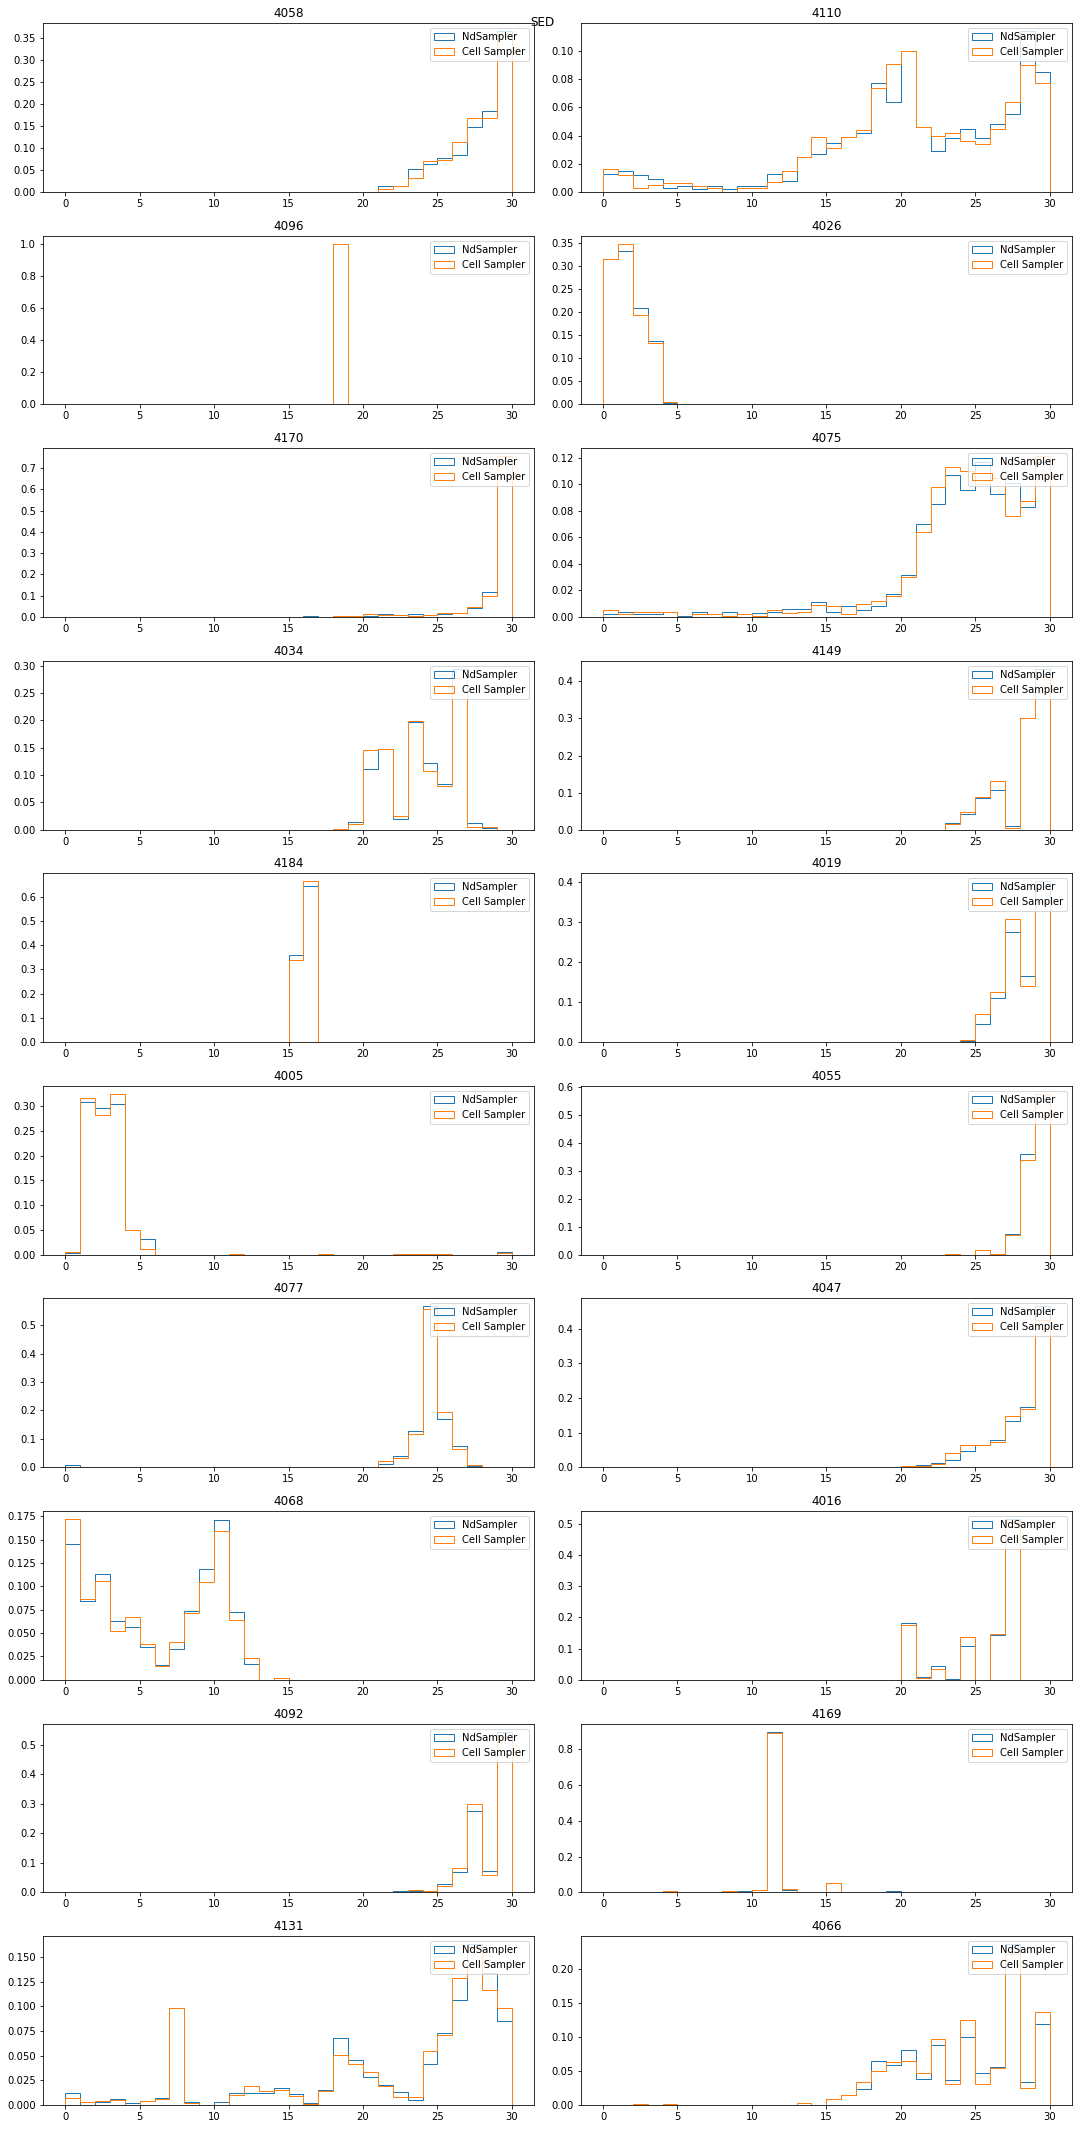

In [10]:
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15, 30))

plt.suptitle('SED')
for idx, ax in zip(obj_idx, axes.ravel()):
    obj_id = sam[idx]['ID']
    ax.set_title(obj_id)
    sam_mask = sam_post['OBJECT_ID'] == obj_id
    ax.hist(sam_post[sam_mask]['SED_INDEX'], bins=np.arange(0,31), histtype='step', label='NdSampler', density=True)
    dev_mask = dev_post['OBJECT_ID'] == obj_id
    ax.hist(dev_post[dev_mask]['SED_INDEX'], bins=np.arange(0,31), histtype='step', label='Cell Sampler', density=True)
    ax.legend()
plt.tight_layout()
plt.show()